# Loading the Data

## Sentiment Analysis of Real-time Flipkart Product Reviews

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("C:\Users\doppa\Downloads\final_dataset.csv")

In [47]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [49]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [50]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

## Handling Null values:

In [51]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [52]:
df['Review Title'].fillna(df['Review Title'].mode()[0],inplace=True)

In [53]:
df.isnull().sum()

Reviewer Name       10
Review Title         0
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

In [54]:
df.duplicated().sum()

4

In [55]:
df = df.drop_duplicates()

<Axes: xlabel='Ratings', ylabel='count'>

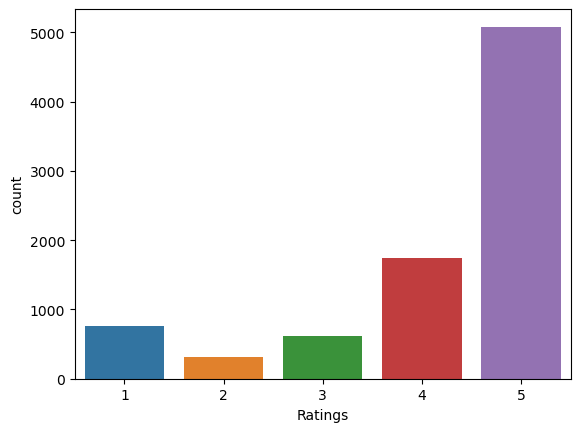

In [56]:
sns.countplot(x='Ratings', data=df)

In [96]:
df['Reviews'] = df['Review Title'].astype(str).str.cat(df['Review text'].astype(str), sep='')

In [97]:
df['Ratings'] = df['Ratings'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

In [98]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Reviews
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",0.0,"Nice productNice product, good quality, but pr..."
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,NaN,Don't waste your moneyThey didn't supplied Yon...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,NaN,Did not meet expectationsWorst product. Damage...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",NaN,"FairQuite O. K. , but nowadays the quality of..."
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,NaN,Over pricedOver pricedJust â?¹620 ..from retai...


In [99]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings', 'Reviews'],
      dtype='object')

In [100]:
selected_columns = ['Ratings', 'Reviews']
selected_df = df[selected_columns]

In [101]:
csv_filename = 'sentiment_analysis.csv'
selected_df.to_csv(csv_filename, index=False)

In [102]:
from IPython.display import FileLink
FileLink(csv_filename)

C:\Users\Vanita Deshmukh\Data Science\INTERNSHIP_TASK\MLFLOW\sentiment_analysis.csv

## Identifying Input and Output variables

In [59]:
X=df[['Reviews']]

In [60]:
y=df[['Ratings']]

## Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=40)

In [63]:
X_train

,Reviews
7961,Super!Please rate very to mach.. products very...
6263,Super!good n genuine productREAD MORE
7092,Classy productit's goodREAD MORE
1741,TerrificGoodREAD MORE
1092,Must buy!ExcellentREAD MORE
...,...
7839,Highly recommendedSatisfying product one can e...
3603,Nice!Good product from yonexREAD MORE
5959,Terrific purchasevery low quality birdies. 3 o...
5426,Terrific purchaseQuality is goodREAD MORE


In [64]:
y_train

,Ratings
7961,1
6263,1
7092,1
1741,1
1092,1
...,...
7839,1
3603,1
5959,0
5426,1


In [65]:
X_test

,Reviews
7666,Simply awesomeVery nice to playREAD MORE
635,Simply awesomeBest :)READ MORE
5751,Simply awesomeTeriffic productREAD MORE
2117,Just wow!GoodREAD MORE
1945,Classy productGoodREAD MORE
...,...
1858,AwesomeGoodREAD MORE
3042,Simply awesomeWe used to break 1 feather shutt...
2201,ExcellentExcellent productREAD MORE
5469,Good choiceshuttles are very old. they damaged...


In [66]:
y_test

,Ratings
7666,1
635,1
5751,1
2117,1
1945,1
...,...
1858,1
3042,1
2201,1
5469,0


# Data Preprocessing of Train data and Test data

In [67]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [68]:
stem = PorterStemmer()

In [69]:
lemma = WordNetLemmatizer()

In [70]:

def preprocess(data):

    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)

    # converts words to lowercase
    sentence = sentence.lower()

    # tokenization
    sentence = sentence.split()

    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]

    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]

    sentence=  " ".join(sentence)

    return sentence

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vanita
[nltk_data]     Deshmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Vanita
[nltk_data]     Deshmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Applying preprocesing on train_data

In [73]:
X_train= X_train['Reviews'].apply(preprocess)

# Applying preprocesing on test data

In [74]:
X_test = X_test['Reviews'].apply(preprocess)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv = CountVectorizer()

In [77]:
%time X_train_num = cv.fit_transform(X_train)

CPU times: total: 78.1 ms
Wall time: 158 ms


In [78]:
%time X_test_num = cv.transform(X_test)

CPU times: total: 0 ns
Wall time: 41.4 ms


In [79]:
from joblib import Memory
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.metrics import f1_score

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
import mlflow
mlflow.set_experiment("Sentiment_Analysis")

<Experiment: artifact_location='file:///C:/Users/Vanita%20Deshmukh/Data%20Science/INTERNSHIP_TASK/MLFLOW/mlruns/272580756613674794', creation_time=1711703350071, experiment_id='272580756613674794', last_update_time=1711703350071, lifecycle_stage='active', name='Sentiment_Analysis', tags={}>

## Auto Logging All Experiment Runs using MLFlow

In [82]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}


In [83]:
import joblib
import os

In [84]:
# if not os.path.exists('best_models'):
#     os.makedirs('best_models')

# best_models = {}

# for algo in pipelines.keys():
#     print("*" * 10, algo, "*" * 10)
#     grid_search = GridSearchCV(estimator=pipelines[algo],
#                                param_grid=param_grids[algo],
#                                cv=5,
#                                scoring='f1',
#                                return_train_score=True,
#                                verbose=1
#                                )

#     # Fit
#     start_fit_time = time.time()
#     grid_search.fit(X_train, y_train)
#     end_fit_time = time.time()

#     # Predict
#     start_predict_time = time.time()
#     y_pred = grid_search.predict(X_test)
#     end_predict_time = time.time()

#     # Saving the best model
#     model_path = f'best_models/{algo}.pkl'
#     joblib.dump(grid_search.best_estimator_, model_path)
#     model_size = os.path.getsize(model_path)

#     # Compute F1 score
#     test_f1_score = f1_score(y_test, y_pred)

#     # Print Log
#     print('Train Score: ', grid_search.best_score_)
#     print('Test F1 Score: ', test_f1_score)  # Print F1 score
#     print("Fit Time: ", end_fit_time - start_fit_time)
#     print("Predict Time: ", end_predict_time - start_predict_time)
#     print("Model Size: ", model_size)

#     print()

#     # Start the experiment run
#     with mlflow.start_run() as run:
#         # Log Parameters with mlflow.log_param()
#         mlflow.log_param("algorithm", algo)
#         mlflow.log_param("hyperparameter_grid", param_grids[algo])
#         mlflow.log_param("best_hyperparameter", grid_search.best_params_)

#         # Log Metrics with mlflow.log_metric()
#         mlflow.log_metric("train_score", grid_search.best_score_)
#         mlflow.log_metric("test_f1_score", test_f1_score)  
#         mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
#         mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
#         mlflow.log_metric("model_size", model_size)

#         # Log Model using mlflow.sklearn.log_model()
#         mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")

In [85]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** naive_bayes **********


2024/03/29 14:41:57 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/29 14:41:57 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 11 s
Wall time: 56.4 s
Train Score:  0.9164843405050135
Test Score:  0.920778318276581

********** decision_tree **********


2024/03/29 14:42:56 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 1min 8s
Wall time: 2min 52s
Train Score:  0.9063664325763451
Test Score:  0.9030955585464333

********** logistic_regression **********


2024/03/29 14:45:50 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 8min 41s
Wall time: 16min 13s
Train Score:  0.9001421315586574
Test Score:  0.9062730627306272

